<a href="https://colab.research.google.com/github/light-ti-man/Drop_of_my_Python_Projects/blob/master/Hackathon/bed_utilization_rate_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df = pd.read_csv('merge-result-cleaned1.csv')
df.head(5)

,Unnamed: 0,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE,cases,deaths
0,0,85.0,55.0,6.0,6.0,0.0,0.623113,30.0,2.0,39785.0,931.0
1,1,386.0,362.0,51.0,51.0,0.0,2.248812,24.0,8.0,77258.0,992.0
2,2,74.0,30.0,5.0,5.0,0.0,0.378721,44.0,2.0,24648.0,155.0
3,3,35.0,25.0,4.0,4.0,0.0,0.430904,10.0,1.0,13685.0,103.0
4,4,25.0,25.0,6.0,6.0,0.0,0.499069,0.0,2.0,19359.0,82.0


In [3]:
df.columns

Index(['Unnamed: 0', 'NUM_LICENSED_BEDS', 'NUM_STAFFED_BEDS', 'NUM_ICU_BEDS',
       'ADULT_ICU_BEDS', 'PEDI_ICU_BEDS', 'BED_UTILIZATION',
       'Potential_Increase_In_Bed_Capac', 'AVG_VENTILATOR_USAGE', 'cases',
       'deaths'],
      dtype='object')

In [4]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head(5)

,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE,cases,deaths
0,85.0,55.0,6.0,6.0,0.0,0.623113,30.0,2.0,39785.0,931.0
1,386.0,362.0,51.0,51.0,0.0,2.248812,24.0,8.0,77258.0,992.0
2,74.0,30.0,5.0,5.0,0.0,0.378721,44.0,2.0,24648.0,155.0
3,35.0,25.0,4.0,4.0,0.0,0.430904,10.0,1.0,13685.0,103.0
4,25.0,25.0,6.0,6.0,0.0,0.499069,0.0,2.0,19359.0,82.0


In [5]:
df.isnull().sum()

NUM_LICENSED_BEDS                  0
NUM_STAFFED_BEDS                   0
NUM_ICU_BEDS                       0
ADULT_ICU_BEDS                     0
PEDI_ICU_BEDS                      0
BED_UTILIZATION                    0
Potential_Increase_In_Bed_Capac    0
AVG_VENTILATOR_USAGE               0
cases                              0
deaths                             0
dtype: int64

In [6]:
Y = df['BED_UTILIZATION']
X = df.drop('BED_UTILIZATION',axis=1)

In [7]:
# Split train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=5)

**Random Forest Model**

In [8]:
RFRegressor = RandomForestRegressor()
prm = {
    "n_estimators":[200,400,600,800],
    "max_depth":[16,32,64,128,256,None]
}

In [9]:
GS = GridSearchCV(RFRegressor,prm,cv=8)
GS.fit(X_train, Y_train)

GridSearchCV(cv=8, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [10]:
#Prediction
from sklearn.metrics import r2_score

Predict_Y = GS.predict(X_test)
#Evaluating algorithm performance
r2 = r2_score(Y_test,Predict_Y)
#MSE Result
rmse = mean_squared_error(Y_test,Predict_Y)
print('R^2 Score:, %.2f' % r2)
print('Root Mean Squared Error:, %.2f' % np.sqrt(rmse))

R^2 Score:, 0.93
Root Mean Squared Error:, 0.66


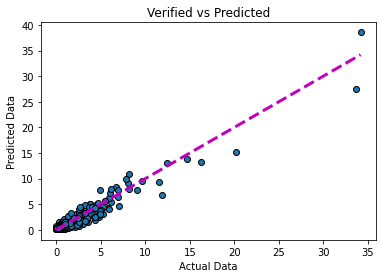

In [11]:
fig, pX = plt.subplots()

pX.scatter(Y_test, Predict_Y, edgecolors=(0, 0, 0))
pX.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'm--', lw=3)
pX.set_xlabel('Actual Data')
pX.set_ylabel('Predicted Data')
pX.set_title("Verified vs Predicted")
plt.show()

**GradientBoosting Model**

In [12]:
GBRegressor = GradientBoostingRegressor()
prm = {
    "n_estimators":[200,400,600,800],
    "max_depth":[16,32,64,128,256,None]
}

In [13]:
GS_GB = GridSearchCV(GBRegressor,prm,cv=8)
GS_GB.fit(X_train, Y_train)

GridSearchCV(cv=8, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [14]:
#Prediction
from sklearn.metrics import r2_score

Predict_YG = GS_GB.predict(X_test)
#Evaluating algorithm performance
r2_B = r2_score(Y_test,Predict_YG)
#MSE Result
rmse_B = mean_squared_error(Y_test,Predict_YG)
print('R^2 Score:, %.2f' % r2_B)
print('Root Mean Squared Error:, %.2f' % np.sqrt(rmse_B))

R^2 Score:, 0.85
Root Mean Squared Error:, 0.98


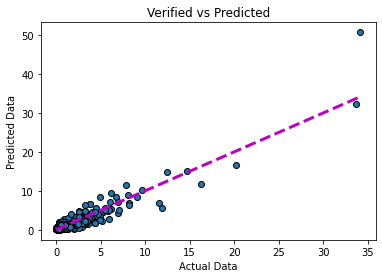

In [15]:
fig, pX = plt.subplots()

pX.scatter(Y_test, Predict_YG, edgecolors=(0, 0, 0))
pX.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'm--', lw=3)
pX.set_xlabel('Actual Data')
pX.set_ylabel('Predicted Data')
pX.set_title("Verified vs Predicted")
plt.show()